In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 model with pre-trained weights, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [3]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=3)


Epoch 1/3
782/782 [==============================] - 145s 181ms/step - loss: 2.1083 - accuracy: 0.0910 - val_loss: 1.9859 - val_accuracy: 0.0250
Epoch 2/3
782/782 [==============================] - 141s 181ms/step - loss: 1.9463 - accuracy: 0.1087 - val_loss: 1.8810 - val_accuracy: 0.2053
Epoch 3/3
782/782 [==============================] - 160s 205ms/step - loss: 1.9012 - accuracy: 0.1049 - val_loss: 1.9111 - val_accuracy: 0.0710


313/313 [==============================] - 25s 75ms/step
              precision    recall  f1-score   support

           0       0.47      0.33      0.39      1000
           1       0.36      0.42      0.39      1000
           2       0.62      0.02      0.03      1000
           3       0.22      0.07      0.11      1000
           4       0.31      0.30      0.30      1000
           5       0.29      0.40      0.34      1000
           6       1.00      0.00      0.00      1000
           7       0.24      0.61      0.35      1000
           8       0.46      0.46      0.46      1000
           9       0.33      0.63      0.43      1000

    accuracy                           0.32     10000
   macro avg       0.43      0.32      0.28     10000
weighted avg       0.43      0.32      0.28     10000

[[333 106   4  10  75  28   0 125 241  78]
 [ 32 418   0  10   3  26   0 108  63 340]
 [104  51  16  43 204 225   0 263  35  59]
 [ 26  55   0  74  84 266   0 325  23 147]
 [ 37  46   

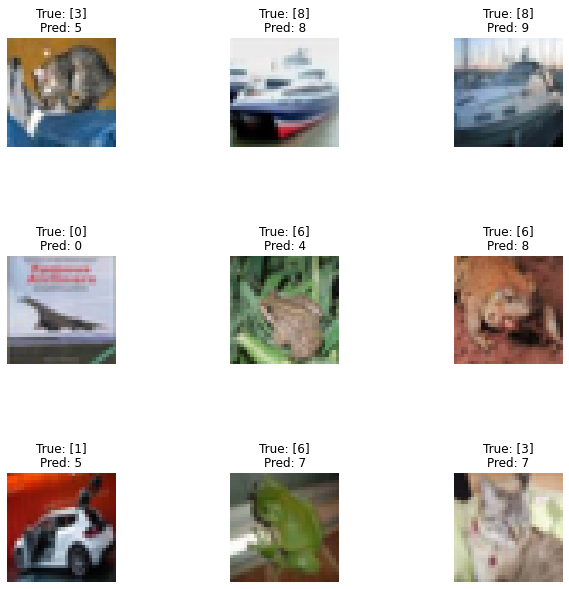

In [4]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate accuracy, precision, recall, and F1-score
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize some predictions
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in np.arange(0, 9):
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()
